In [1]:
#The numpy and pandas libraries are used for data manipulation and analysis
#The requests library is used for sending HTTP requests to websites.
#The time library is used for pausing the script for a specified amount of time. The json library is used for working with JSON data.
#Finally, the BeautifulSoup library is used for web scraping by parsing HTML and XML files.

import numpy as np
import pandas as pd
import requests
import time
import json
from bs4 import BeautifulSoup




In [2]:
#Initial api call to business review page on Hello Peter


url = 'https://api.hellopeter.com/consumer/business/nedbank/reviews'

response = requests.get(url)
init_dictionary = response.json()



In [3]:
#accessing the value of the 'last_page' key in the  dictionary and adding 1 to it to determine the last page number. 

if 'last_page' in init_dictionary:
    try:
        pagination_lastpage = int(init_dictionary['last_page']) + 1
        pagination_firstpage = 0
    except ValueError:
        print("Error: 'last_page' value is not a valid integer.")
else:
    print("Error: 'last_page' key not found in dictionary.")





In [4]:
# Make request up to 3 times, with a delay of 10 seconds between attempts, 
# and breaks out of the loop if the request is successful or the maximum number of retries is reached.
import time
import requests

start = time.time()

#Blank list to which to write the Json in dictionary format for each page.
hp_dictionary_allpages = []

#persist certain parameters across requests, such as cookies, headers, and auth
session = requests.Session()


#Loop through each of the pages on Hello Peter which contains the complaints.
for x in range(pagination_firstpage, pagination_lastpage):
    url2 = init_dictionary['next_page_url'][:-1] + str((x+1))

    # Try to make the request up to three times
    for attempt in range(3):
        try:
            response2 = session.get(url2)
            response2.raise_for_status()  # Add this line to check for HTTP errors
            hp_dictionary_allpages.append(response2.json())
            break  # Exit the loop if the request was successful
        except requests.exceptions.HTTPError as e:
            if attempt < 2:
                print(f"Error: {e}. Retrying in 10 seconds...")
                time.sleep(10)
            else:
                print(f"Error: {e}. Maximum retries reached.")
                break  # Exit the loop if maximum retries reached

end = time.time()
print(f'{end - start:.2f} seconds elapsed')



Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/nedbank/reviews?page=140. Retrying in 10 seconds...
Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/nedbank/reviews?page=386. Retrying in 10 seconds...
Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/nedbank/reviews?page=798. Retrying in 10 seconds...
Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/nedbank/reviews?page=2159. Retrying in 10 seconds...
Error: 524 Server Error:  for url: https://api.hellopeter.com/consumer/business/nedbank/reviews?page=2201. Retrying in 10 seconds...
7651.02 seconds elapsed


In [5]:
#prints the keys of the first dictionary in the
print('Page data Structure:\n*************************')
for key in hp_dictionary_allpages[0].keys():
    print(key)


Page data Structure:
*************************
current_page
data
first_page_url
from
last_page
last_page_url
links
next_page_url
path
per_page
prev_page_url
to
total


In [6]:
#prints the keys of the first element (dictionary) in the data list 

print('List of columns  :\n*************************')
for key in hp_dictionary_allpages[0]['data'][0].keys():
    print(key)


List of columns  :
*************************
id
user_id
created_at
authorDisplayName
author
authorAvatar
author_id
review_title
review_rating
review_content
business_name
business_slug
permalink
replied
messages
business_logo
industry_logo
industry_name
industry_slug
status_id
nps_rating
source
is_reported
business_reporting
author_created_date
author_total_reviews_count
attachments


In [7]:
#retrieves the value of the 'total' key from the dictionary at index 20
num_reviews = hp_dictionary_allpages[20]['total']
print(f"{num_reviews} Hallo Peter Reviews Detected")

24982 Hallo Peter Reviews Detected


In [8]:
#Creating a dataframe with all complaints info
complaints_df = pd.DataFrame(hp_dictionary_allpages[0]['data'])
for i in range(1, pagination_lastpage-1):
    temp_df = pd.DataFrame(hp_dictionary_allpages[i]['data'])
    complaints_df = pd.concat([complaints_df, temp_df], ignore_index=True)



In [9]:
#found out the total number of rows and columns in the data set using
complaints_df.shape

(24983, 27)

In [10]:
#list of clumns and data types
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          24983 non-null  int64 
 1   user_id                     24983 non-null  object
 2   created_at                  24983 non-null  object
 3   authorDisplayName           24983 non-null  object
 4   author                      24983 non-null  object
 5   authorAvatar                24983 non-null  object
 6   author_id                   24983 non-null  object
 7   review_title                24983 non-null  object
 8   review_rating               24983 non-null  int64 
 9   review_content              24983 non-null  object
 10  business_name               24983 non-null  object
 11  business_slug               24983 non-null  object
 12  permalink                   24983 non-null  object
 13  replied                     24983 non-null  in

In [11]:
#Save raw data file in csv
complaints_df.to_csv('C:/Miehleketo/msc-miehleketo/data/raw/Nedbank_HelloPeter.csv', index=False)


complaints_df.to_csv('C:/Miehleketo/msc-miehleketo/src/data/Nedbank_HelloPeter.csv', index=False)


In [12]:
# examining missing values
print("Missing values: ")
missing_values = complaints_df.isnull().mean()
print(missing_values)
print("")


Missing values: 
id                            0.000000
user_id                       0.000000
created_at                    0.000000
authorDisplayName             0.000000
author                        0.000000
authorAvatar                  0.000000
author_id                     0.000000
review_title                  0.000000
review_rating                 0.000000
review_content                0.000000
business_name                 0.000000
business_slug                 0.000000
permalink                     0.000000
replied                       0.000000
messages                      0.000000
business_logo                 0.000000
industry_logo                 0.000000
industry_name                 0.000000
industry_slug                 0.000000
status_id                     0.000000
nps_rating                    0.762198
source                        0.443702
is_reported                   0.000000
business_reporting            0.998839
author_created_date           0.000000
author_t

In [13]:
#Make a copy of original dataframe before manipulation
Nedbank_df = complaints_df.copy()


In [14]:
#list of clumns and data types
Nedbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          24983 non-null  int64 
 1   user_id                     24983 non-null  object
 2   created_at                  24983 non-null  object
 3   authorDisplayName           24983 non-null  object
 4   author                      24983 non-null  object
 5   authorAvatar                24983 non-null  object
 6   author_id                   24983 non-null  object
 7   review_title                24983 non-null  object
 8   review_rating               24983 non-null  int64 
 9   review_content              24983 non-null  object
 10  business_name               24983 non-null  object
 11  business_slug               24983 non-null  object
 12  permalink                   24983 non-null  object
 13  replied                     24983 non-null  in

In [15]:
# names of the columns with empty values
columns = ['nps_rating', 'business_reporting','source']

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
    Nedbank_df[column] = Nedbank_df[column].fillna("")


In [16]:
# loop until there are no more duplicates
duplicates_exist = True
while duplicates_exist:
    # check for duplicates using a subset of columns
    subset_cols = ['id', 'created_at', 'author'] # replace with actual column names
    num_duplicates = Nedbank_df.duplicated(subset=subset_cols).sum()
    if num_duplicates > 0:
        # drop duplicates from dataframe
        Nedbank_df.drop_duplicates(subset=subset_cols, inplace=True)
    else:
        duplicates_exist = False

# print the final dataframe
print(Nedbank_df)



            id                               user_id           created_at  \
0      4409348  2c86debb-31fa-11e8-83f4-f23c91bb6188  2023-05-04 08:38:24   
1      4409218  a4e74790-ea30-11ed-abba-addc7ceb12d6  2023-05-04 06:07:51   
2      4409113  b888b9d0-e616-11ed-94d1-1146c0c06d30  2023-05-03 21:35:25   
3      4409091  cf8ca9a0-e9e0-11ed-abe1-6fd4b50b3aed  2023-05-03 21:13:33   
4      4408786  8d4359c0-e9c0-11ed-bee4-95f8f74decc1  2023-05-03 16:56:41   
...        ...                                   ...                  ...   
24978  1624442  20156dc3-31fa-11e8-83f4-f23c91bb6188  2015-01-28 10:13:00   
24979  1624356  fa8e359f-31f9-11e8-83f4-f23c91bb6188  2015-01-28 09:31:00   
24980  1624275  038b3e23-31fa-11e8-83f4-f23c91bb6188  2015-01-28 08:38:00   
24981  1624235  ff3f4e07-31f9-11e8-83f4-f23c91bb6188  2015-01-28 07:57:00   
24982  1624203  0a53ec34-31fa-11e8-83f4-f23c91bb6188  2015-01-28 07:14:00   

      authorDisplayName      author authorAvatar  \
0              Keegan F

In [17]:
#testing if my object has the right type of data in it
Nedbank_df.head()



,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,industry_name,industry_slug,status_id,nps_rating,source,is_reported,business_reporting,author_created_date,author_total_reviews_count,attachments
0,4409348,2c86debb-31fa-11e8-83f4-f23c91bb6188,2023-05-04 08:38:24,Keegan F,Keegan F,,2c86debb-31fa-11e8-83f4-f23c91bb6188,Threats from nedbank but I'm not in arrears,1,I keep getting sms and recorded phone calls fr...,...,Banking,banking,1,,WEBSITE,False,,2016-08-04,12,[]
1,4409218,a4e74790-ea30-11ed-abba-addc7ceb12d6,2023-05-04 06:07:51,Monde M,Monde M,,a4e74790-ea30-11ed-abba-addc7ceb12d6,*******ion and anarchy at Nedbank,1,Good day \n\nI hereby write this email in disg...,...,Banking,banking,1,,WEBSITE,False,,2023-05-04,1,[]
2,4409113,b888b9d0-e616-11ed-94d1-1146c0c06d30,2023-05-03 21:35:25,Kedibone R,Kedibone R,,b888b9d0-e616-11ed-94d1-1146c0c06d30,PATHETIC AND DISGUSTING RUDE NEDBANK,1,NEDBANK INSURANCE SERVICE IS REALLY PATHETIC\n...,...,Banking,banking,1,,WEBSITE,False,,2023-04-29,1,[]
3,4409091,cf8ca9a0-e9e0-11ed-abe1-6fd4b50b3aed,2023-05-03 21:13:33,David H,David H,,cf8ca9a0-e9e0-11ed-abe1-6fd4b50b3aed,A WEEK TI GET MY MONEY BACK AFTER ATM SHUTDOWN,1,Whilst depositing funds at the atm on 28 april...,...,Banking,banking,1,,WEBSITE,False,,2023-05-03,1,[]
4,4408786,8d4359c0-e9c0-11ed-bee4-95f8f74decc1,2023-05-03 16:56:41,Phillip O,Phillip O,,8d4359c0-e9c0-11ed-bee4-95f8f74decc1,Debit order amendments,1,Pathetic service!\n\nI am currently studying a...,...,Banking,banking,1,,WEBSITE,False,,2023-05-03,1,[]


In [18]:
# Get the unique values in the 'review_title' column
unique_review_titles = Nedbank_df['review_title'].sort_values().unique()

# Print the unique values to the console
print(unique_review_titles)


[' 45 minutes wait to get cash in a teller at the bank' ' Bad service !!!'
 ' Cancel Greenbacks subscription.' ... '😭😭😭' '🛑' '🥹']


In [19]:
# Define a function to get unique values of a column
def get_unique_values(column):
    unique_values = set()
    
    # Loop through the values in the column
    for value in column:
        # Check if the value is a float (NaN)
        if isinstance(value, float):
            unique_values.add(None)
        else:
            # Split the value by comma and space
            values = value.split(", ")
            # Loop through the split values and add them to the set of unique values
            for i in values:
                unique_values.add(i)
    
    # Convert the set of unique values to a list and return it
    return list(unique_values)

# Call the function to get the unique values in the 'review_title' column of the 'Nedbank_df' DataFrame
unique_review_titles = get_unique_values(Nedbank_df['review_title'])

# Print the unique values to the console
print(unique_review_titles)


['', 'Nedbank Insurance worst Ever', 'non responsive system', 'Debit Order', 'No one in Nedbank is able to resolve a simple query', 'Worst Home insurance ever', 'Business Account', 'Waiting almost 3 months for a personal level an', 'Disabled person NO SERVICE NEDBANK', 'Leaking geyser', 'Never buy prepaid electricity online from Nedbank', 'No help from the fraud or complaints department ', 'Outstanding Service!!!! ', 'Nedbank is greedy because im white', "Don't waste your time and energy with Nedbank Home Loans... they are useless...", 'Mobimoney ', 'Nedbank Greenbacks portal is down for weeks', 'let me explain how we cannot be of assistance sir.', 'Fraud Service', 'Protea Glen Nedbank is not as efficient and very very poor with customer service', "Nedbank's Bad Service and not making things happen", 'Yet again Nedbank drops the ball!', 'Nedbank holding my money ', 'Heart broken and confused', 'be assured they will let you down.', 'terrible service and endless mess ups - worse experien

In [20]:
# Count the frequency of each review_title and show the top 5
review_counts = Nedbank_df['review_title'].value_counts()
print(review_counts.head())


Bad service     184
Poor service    133
Nedbank         131
Bad Service      87
Poor Service     65
Name: review_title, dtype: int64


In [21]:

# check for and remove leading/trailing whitespace for columns with string data type
str_cols = Nedbank_df.select_dtypes(include=[object]).columns.tolist()
for col in str_cols:
    if Nedbank_df[col].dtype == 'object':
        Nedbank_df[col] = Nedbank_df[col].fillna('').astype(str).str.strip()






In [22]:
#Separate created date to time,day,month and year 
Nedbank_df['Date'] = pd.DatetimeIndex(Nedbank_df['created_at']).date
Nedbank_df['Month'] = pd.DatetimeIndex(Nedbank_df['created_at']).month_name()
Nedbank_df['Year'] = pd.DatetimeIndex(Nedbank_df['created_at']).year
Nedbank_df['Time'] = pd.DatetimeIndex(Nedbank_df['created_at']).time


In [23]:
Nedbank_df.head()


,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,source,is_reported,business_reporting,author_created_date,author_total_reviews_count,attachments,Date,Month,Year,Time
0,4409348,2c86debb-31fa-11e8-83f4-f23c91bb6188,2023-05-04 08:38:24,Keegan F,Keegan F,,2c86debb-31fa-11e8-83f4-f23c91bb6188,Threats from nedbank but I'm not in arrears,1,I keep getting sms and recorded phone calls fr...,...,WEBSITE,False,,2016-08-04,12,[],2023-05-04,May,2023,08:38:24
1,4409218,a4e74790-ea30-11ed-abba-addc7ceb12d6,2023-05-04 06:07:51,Monde M,Monde M,,a4e74790-ea30-11ed-abba-addc7ceb12d6,*******ion and anarchy at Nedbank,1,Good day \n\nI hereby write this email in disg...,...,WEBSITE,False,,2023-05-04,1,[],2023-05-04,May,2023,06:07:51
2,4409113,b888b9d0-e616-11ed-94d1-1146c0c06d30,2023-05-03 21:35:25,Kedibone R,Kedibone R,,b888b9d0-e616-11ed-94d1-1146c0c06d30,PATHETIC AND DISGUSTING RUDE NEDBANK,1,NEDBANK INSURANCE SERVICE IS REALLY PATHETIC\n...,...,WEBSITE,False,,2023-04-29,1,[],2023-05-03,May,2023,21:35:25
3,4409091,cf8ca9a0-e9e0-11ed-abe1-6fd4b50b3aed,2023-05-03 21:13:33,David H,David H,,cf8ca9a0-e9e0-11ed-abe1-6fd4b50b3aed,A WEEK TI GET MY MONEY BACK AFTER ATM SHUTDOWN,1,Whilst depositing funds at the atm on 28 april...,...,WEBSITE,False,,2023-05-03,1,[],2023-05-03,May,2023,21:13:33
4,4408786,8d4359c0-e9c0-11ed-bee4-95f8f74decc1,2023-05-03 16:56:41,Phillip O,Phillip O,,8d4359c0-e9c0-11ed-bee4-95f8f74decc1,Debit order amendments,1,Pathetic service!\n\nI am currently studying a...,...,WEBSITE,False,,2023-05-03,1,[],2023-05-03,May,2023,16:56:41


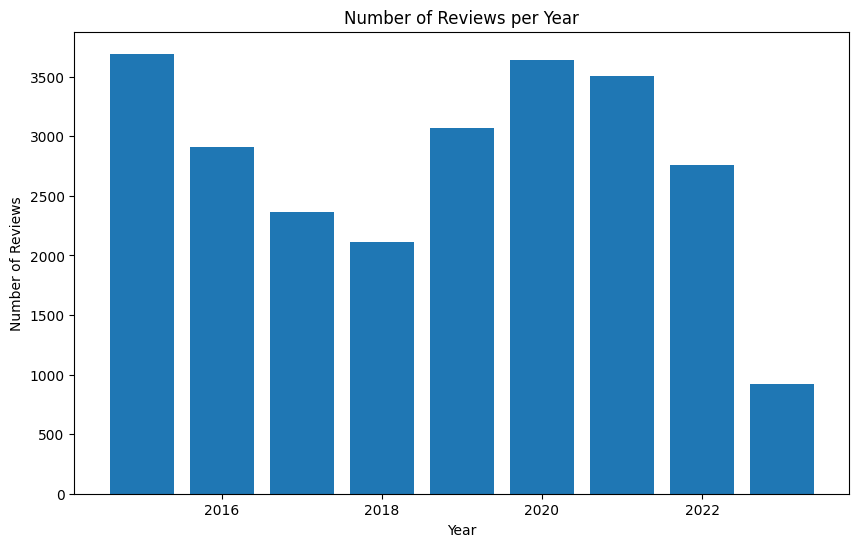

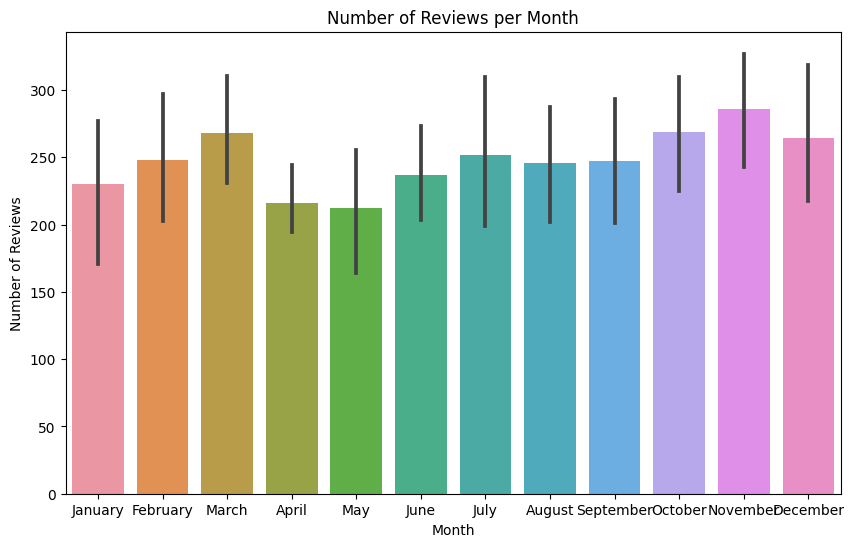

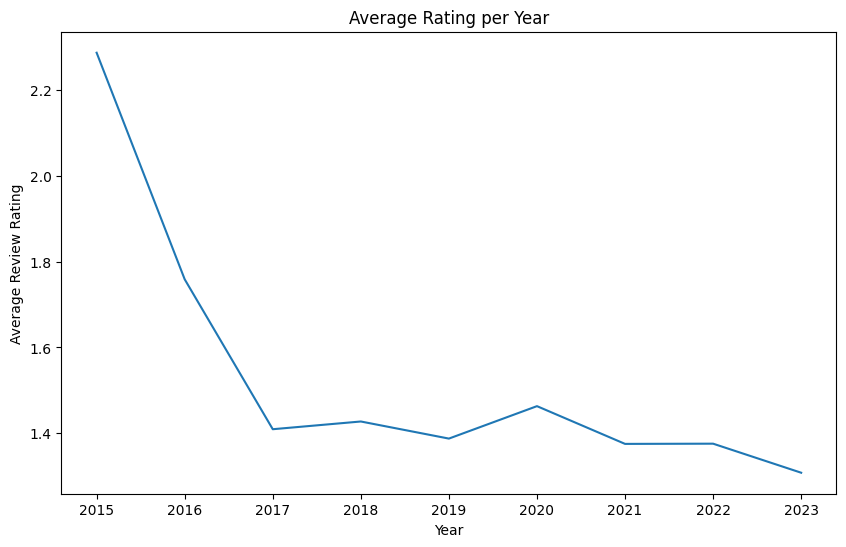

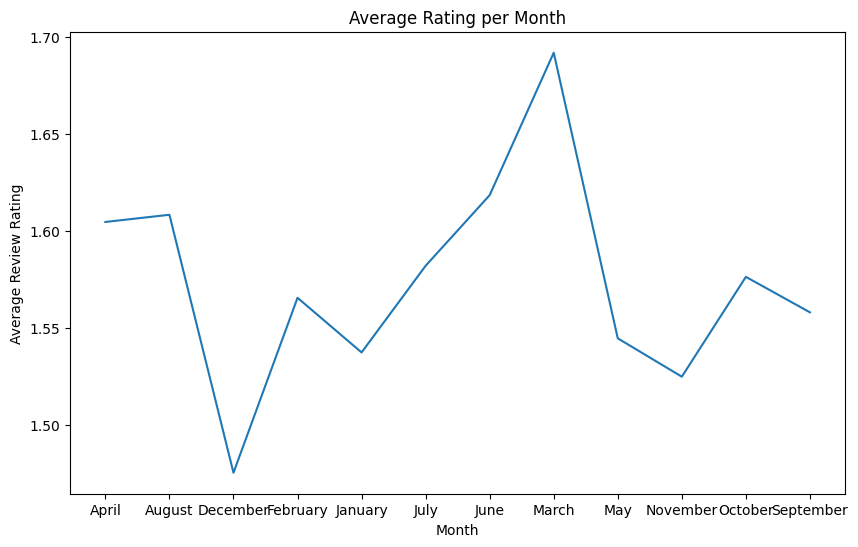

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Convert 'Date' column to datetime format
Nedbank_df['Date'] = pd.to_datetime(Nedbank_df['Date'])

# Calculate the number of reviews per year
reviews_per_year = Nedbank_df.groupby(Nedbank_df['Date'].dt.year).size()

# Calculate the number of reviews per month
reviews_per_month = Nedbank_df.set_index('Date').resample('MS').size()

# Plot a bar chart of reviews per year
plt.figure(figsize=(10,6))
plt.bar(reviews_per_year.index, reviews_per_year.values)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

# Create a new DataFrame with a datetime index and resample by month
reviews_per_month = Nedbank_df.set_index('Date').resample('MS').size().reset_index(name='count')

# Sort the index in calendar order
reviews_per_month['Month'] = pd.Categorical(reviews_per_month['Date'].dt.strftime('%B'), categories=calendar.month_name[1:], ordered=True)

# Plot a bar chart of reviews per month
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='count', data=reviews_per_month)
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

# Calculate the average rating per year
avg_rating_per_year = Nedbank_df.groupby(Nedbank_df['Date'].dt.year)['review_rating'].mean()

# Plot a line chart of average rating per year
plt.figure(figsize=(10,6))
plt.plot(avg_rating_per_year.index, avg_rating_per_year.values)
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Review Rating')
plt.show()

# Calculate the average rating per month
avg_rating_per_month = Nedbank_df.groupby(Nedbank_df['Date'].dt.month_name())['review_rating'].mean()

# Plot a line chart of average rating per month
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_rating_per_month.index, y=avg_rating_per_month.values)
plt.title('Average Rating per Month')
plt.xlabel('Month')
plt.ylabel('Average Review Rating')
plt.show()


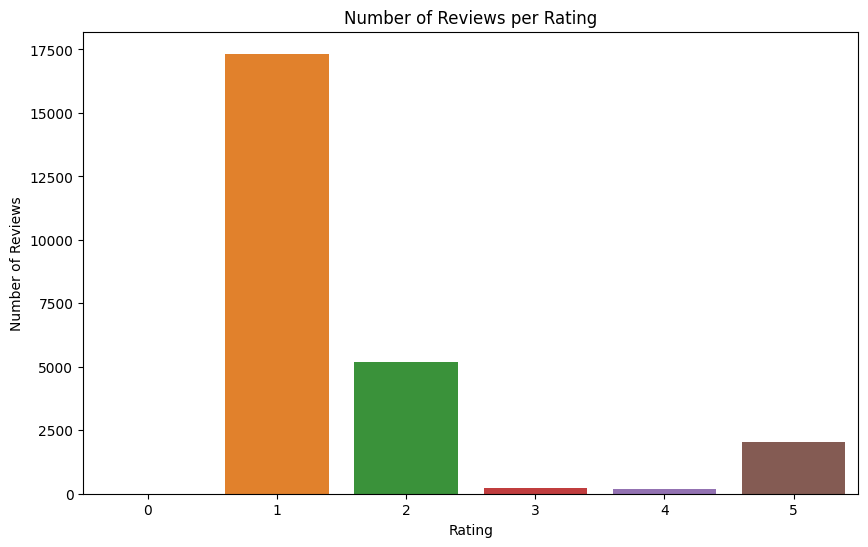

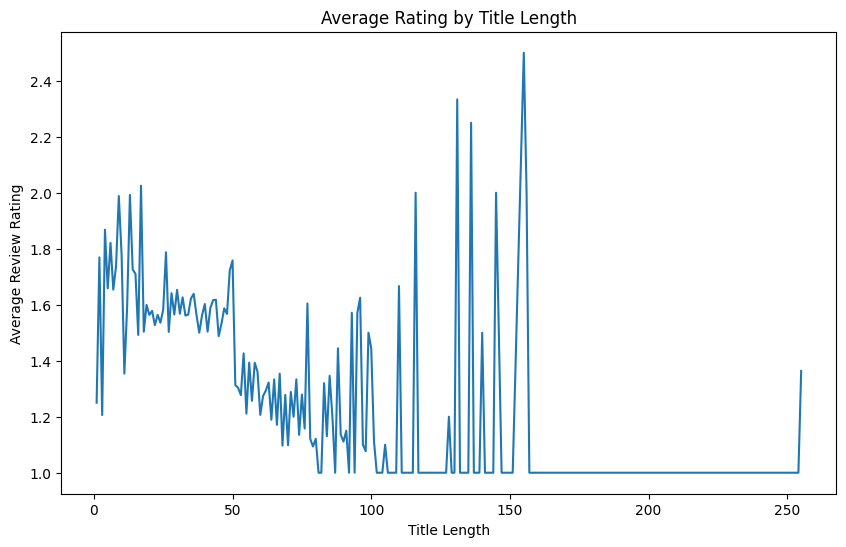

In [25]:


# Remove leading/trailing whitespace from review_title column
Nedbank_df['review_title'] = Nedbank_df['review_title'].str.strip()

# Count the number of reviews per rating
reviews_per_rating = Nedbank_df['review_rating'].value_counts()

# Plot a bar chart of reviews per rating
plt.figure(figsize=(10,6))
sns.barplot(x=reviews_per_rating.index, y=reviews_per_rating.values)
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Calculate the average rating per title length
Nedbank_df['title_length'] = Nedbank_df['review_title'].str.len()
avg_rating_by_title_length = Nedbank_df.groupby('title_length')['review_rating'].mean()

# Plot a line chart of average rating by title length
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_rating_by_title_length.index, y=avg_rating_by_title_length.values)
plt.title('Average Rating by Title Length')
plt.xlabel('Title Length')
plt.ylabel('Average Review Rating')
plt.show()



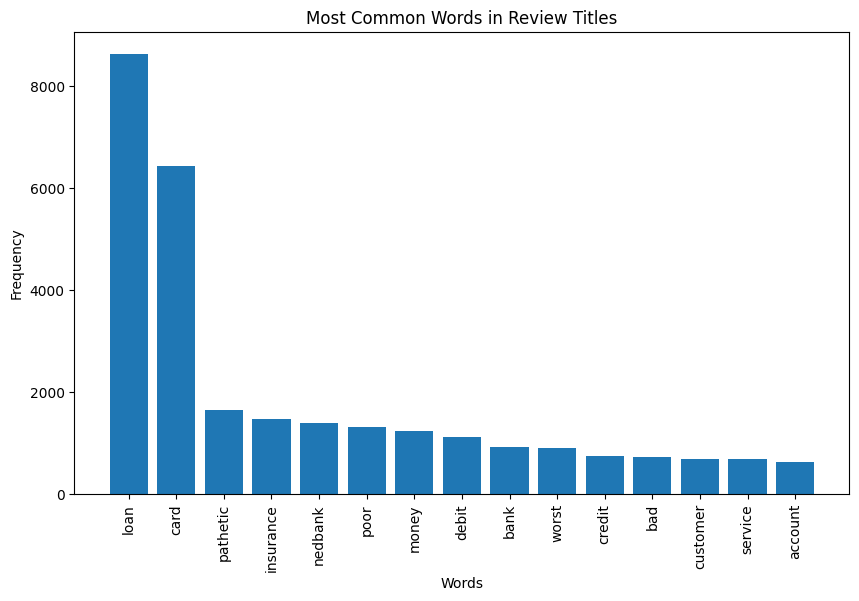

In [26]:
#To find the most common words mentioned in the Nedbank_df dataframe
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Create a CountVectorizer object
cv = CountVectorizer(stop_words='english', max_features=15)

# Fit and transform the review_title column
title_words = cv.fit_transform(Nedbank_df['review_title'])

# Get the feature names (i.e., the most common words)
words = cv.vocabulary_.keys()

# Sum the counts for each word
word_counts = title_words.sum(axis=0)

# Create a dictionary of word counts
word_count_dict = dict(zip(words, word_counts.tolist()[0]))

# Sort the dictionary in descending order by value
sorted_word_count_dict = dict(sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True))

# Plot the most common words
plt.figure(figsize=(10,6))
plt.bar(sorted_word_count_dict.keys(), sorted_word_count_dict.values())
plt.xticks(rotation=90)
plt.title('Most Common Words in Review Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [27]:
# Create a new column indicating whether a review has been replied to by the business
Nedbank_df['is_replied'] = Nedbank_df['replied'].notnull()

# Count the number of reviews that have been replied to by the business
num_replied_reviews = Nedbank_df['is_replied'].sum()

print(f"Number of reviews replied to by the business: {num_replied_reviews}")



Number of reviews replied to by the business: 24981


<Axes: xlabel='review_rating'>

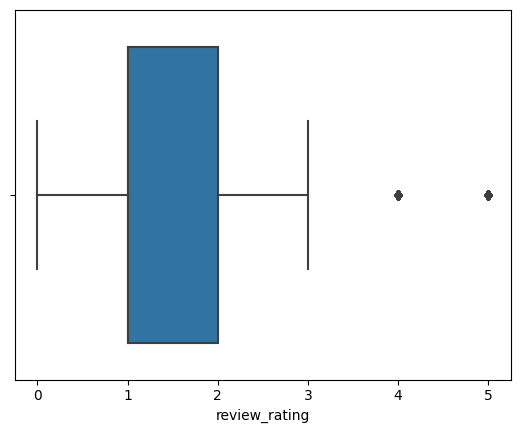

In [28]:
#build a review_rating overview
import seaborn as sns

# Create a boxplot of review ratings
sns.boxplot(x=Nedbank_df['review_rating'])


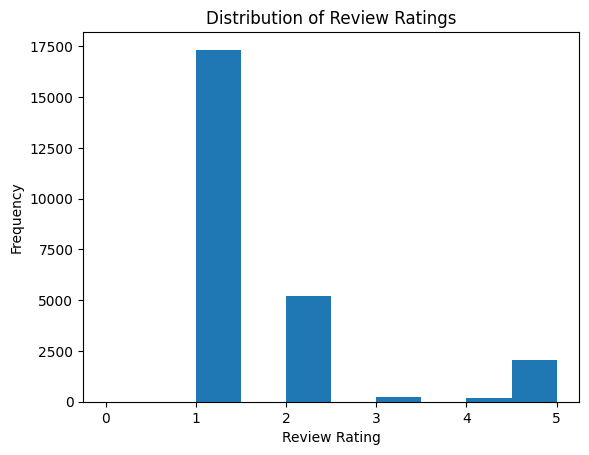

In [29]:
#build a Distribution of review ratings 

import matplotlib.pyplot as plt

# Create a histogram of the review ratings
plt.hist(Nedbank_df['review_rating'], bins=10)

# Set the title and axis labels
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()



<Axes: xlabel='review_rating', ylabel='count'>

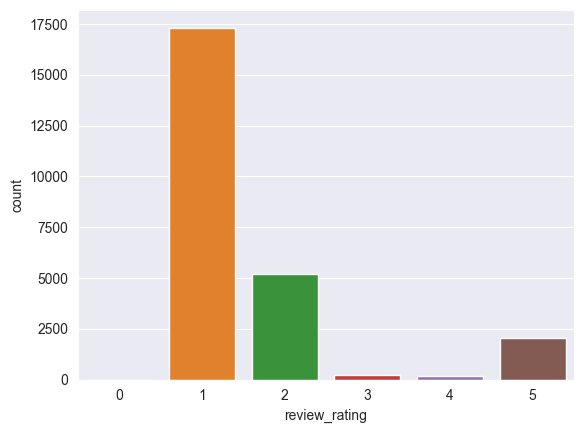

In [30]:
#build a Review volume ratings

import seaborn as sns

sns.set_style('darkgrid')
sns.countplot(x='review_rating', data=Nedbank_df)


In [31]:
#perform sentiment analysis on the Nedbank_df

from textblob import TextBlob

# Define a function to get the sentiment polarity of a text
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis function to the review_content column
Nedbank_df['sentiment_polarity'] = Nedbank_df['review_content'].apply(get_sentiment_polarity)

# Print the average sentiment polarity
print("Average sentiment polarity:", Nedbank_df['sentiment_polarity'].mean())


Average sentiment polarity: -0.014529204509464622


In [32]:
Nedbank_df.head()

,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,author_created_date,author_total_reviews_count,attachments,Date,Month,Year,Time,title_length,is_replied,sentiment_polarity
0,4409348,2c86debb-31fa-11e8-83f4-f23c91bb6188,2023-05-04 08:38:24,Keegan F,Keegan F,,2c86debb-31fa-11e8-83f4-f23c91bb6188,Threats from nedbank but I'm not in arrears,1,I keep getting sms and recorded phone calls fr...,...,2016-08-04,12,[],2023-05-04,May,2023,08:38:24,43,True,-0.166667
1,4409218,a4e74790-ea30-11ed-abba-addc7ceb12d6,2023-05-04 06:07:51,Monde M,Monde M,,a4e74790-ea30-11ed-abba-addc7ceb12d6,*******ion and anarchy at Nedbank,1,Good day \n\nI hereby write this email in disg...,...,2023-05-04,1,[],2023-05-04,May,2023,06:07:51,33,True,0.237500
2,4409113,b888b9d0-e616-11ed-94d1-1146c0c06d30,2023-05-03 21:35:25,Kedibone R,Kedibone R,,b888b9d0-e616-11ed-94d1-1146c0c06d30,PATHETIC AND DISGUSTING RUDE NEDBANK,1,NEDBANK INSURANCE SERVICE IS REALLY PATHETIC\n...,...,2023-04-29,1,[],2023-05-03,May,2023,21:35:25,36,True,-0.152381
3,4409091,cf8ca9a0-e9e0-11ed-abe1-6fd4b50b3aed,2023-05-03 21:13:33,David H,David H,,cf8ca9a0-e9e0-11ed-abe1-6fd4b50b3aed,A WEEK TI GET MY MONEY BACK AFTER ATM SHUTDOWN,1,Whilst depositing funds at the atm on 28 april...,...,2023-05-03,1,[],2023-05-03,May,2023,21:13:33,46,True,-0.023588
4,4408786,8d4359c0-e9c0-11ed-bee4-95f8f74decc1,2023-05-03 16:56:41,Phillip O,Phillip O,,8d4359c0-e9c0-11ed-bee4-95f8f74decc1,Debit order amendments,1,Pathetic service!\n\nI am currently studying a...,...,2023-05-03,1,[],2023-05-03,May,2023,16:56:41,22,True,0.041176


Number of reviews replied to by the business: 24981


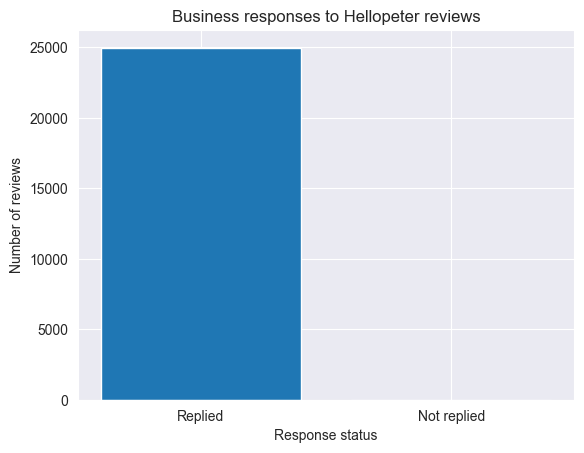

In [33]:
#Business responses

# Create a new column indicating whether a review has been replied to by the business
Nedbank_df['is_replied'] = Nedbank_df['replied'].notnull()

# Count the number of reviews that have been replied to by the business
num_replied_reviews = Nedbank_df['is_replied'].sum()

print(f"Number of reviews replied to by the business: {num_replied_reviews}")

# Plot the results
import matplotlib.pyplot as plt

plt.bar(['Replied', 'Not replied'], [num_replied_reviews, len(Nedbank_df) - num_replied_reviews])
plt.title('Business responses to Hellopeter reviews')
plt.xlabel('Response status')
plt.ylabel('Number of reviews')
plt.show()


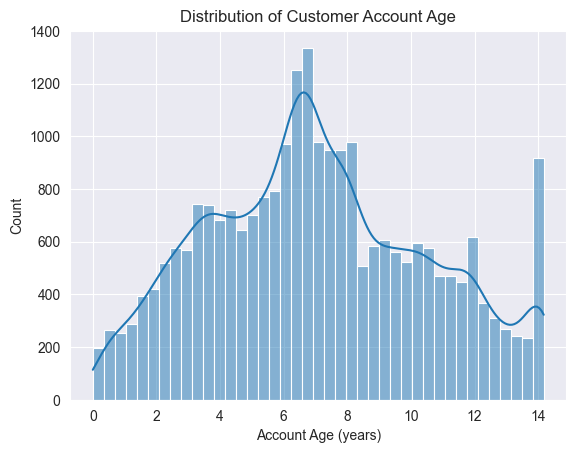

In [34]:
# analyze customer demographics of hellopeter


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Convert author_created_date to datetime
Nedbank_df['author_created_date'] = pd.to_datetime(Nedbank_df['author_created_date'])

# Calculate the age of the account in years
Nedbank_df['account_age'] = (datetime.datetime.now() - Nedbank_df['author_created_date']).dt.days / 365

# Plot a histogram of account age
sns.histplot(data=Nedbank_df, x='account_age', kde=True)
plt.title('Distribution of Customer Account Age')
plt.xlabel('Account Age (years)')
plt.ylabel('Count')
plt.show()


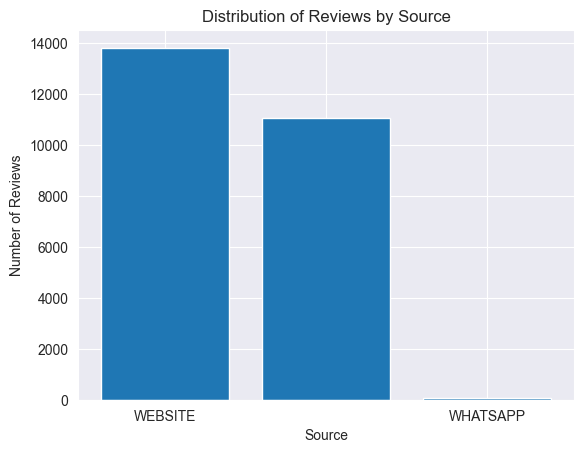

In [35]:
#analyze the source in the Hellopeter dataframe

import matplotlib.pyplot as plt

# Count the number of reviews from each source
source_counts = Nedbank_df['source'].value_counts()

# Plot the distribution using a bar chart
plt.bar(source_counts.index, source_counts.values)
plt.title('Distribution of Reviews by Source')
plt.xlabel('Source')
plt.ylabel('Number of Reviews')
plt.show()


In [36]:
print(Nedbank_df["source"].unique())

['WEBSITE' 'WHATSAPP' '']


In [37]:
#Most used words in the review

import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Concatenate the review_title, review_content, and industry_name columns to create a new column called "text"
Nedbank_df['text'] = Nedbank_df['review_title'] + ' ' + Nedbank_df['review_content'] + ' ' + Nedbank_df['industry_name']

# Remove any punctuation and convert all text to lowercase
Nedbank_df['text'] = Nedbank_df['text'].str.lower().str.replace('[^\w\s]', '', regex=True)



# Tokenize the text by splitting it into individual words
Nedbank_df['tokens'] = Nedbank_df['text'].apply(nltk.word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
Nedbank_df['tokens'] = Nedbank_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Count the frequency of each word
word_freq = Counter()
Nedbank_df['tokens'].apply(lambda x: word_freq.update(x))

# Sort the words in descending order by their frequency
top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 words and their frequencies
for word, freq in top_words:
    print(f"{word}: {freq}")


nedbank: 51101
banking: 29870
account: 28402
service: 18077
bank: 17133
call: 14998
card: 14874
money: 14854
get: 12048
branch: 11886


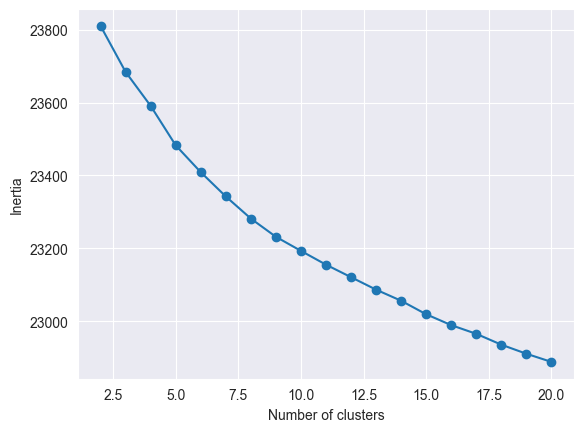

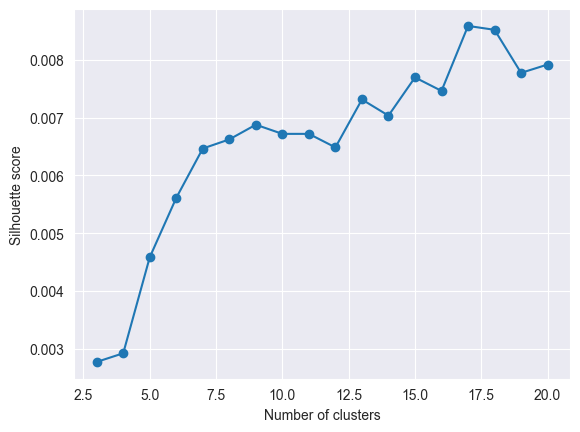

        review_rating           business_name industry_name
                count      mean          mode          mode
cluster                                                    
0                 951  2.289169       Nedbank       Banking
1                1911  1.343799       Nedbank       Banking
2               13502  1.736335       Nedbank       Banking
3                5644  1.267541       Nedbank       Banking
4                2973  1.341406       Nedbank       Banking


In [38]:
#perform cluster analysis on the Nedbank_df dataframe

import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select relevant columns
Nedbank_df.dropna(inplace=True)

cluster_df = Nedbank_df[['review_rating', 'review_content', 'business_name', 'industry_name']].copy()

# Drop rows with missing data
cluster_df.dropna(inplace=True)

# Preprocess text data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    tokens = [t for t in tokens if t not in stop_words]  # remove stop words
    stems = [stemmer.stem(t) for t in tokens]  # stem
    return ' '.join(stems)

cluster_df['review_content'] = cluster_df['review_content'].apply(preprocess_text)

# Convert text data to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cluster_df['review_content'])

# Determine optimal number of clusters
inertias = []
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # set n_init to suppress warning
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    if k > 2:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot elbow plot
plt.plot(range(2, 21), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette score plot
plt.plot(range(3, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Perform clustering with optimal number of clusters
n_clusters = 5  # chosen based on elbow plot and silhouette score
kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=0) # set n_init to suppress warning
kmeans.fit(X)

# Add cluster labels to dataframe
cluster_df['cluster'] = kmeans.labels_

# Display summary statistics of clusters
print(cluster_df.groupby('cluster').agg({
    'review_rating': ['count', 'mean'],
    'business_name': pd.Series.mode,
    'industry_name': pd.Series.mode
}))



In [39]:
#Save processed data in csv
Nedbank_df.to_csv('C:/Miehleketo/msc-miehleketo/data/processed/Nedbank_HelloPeter_processed.csv', index=False)

Nedbank_df.to_csv('C:/Miehleketo/msc-miehleketo/src/data/Nedbank_HelloPeter_processed.csv', index=False)